# CMSC320 Final Project
#### Produced by: Corbin Austin, Rob Milner, and Briana Watson
## Introduction
The purpose of this tutorial is to show you how to ...... (Just talk about what we want the reader to get out of this tutorial)

## Data Collection
We will be using data collected from the .... (Talk about the API and give links to various website for outside knowledge)

We have chosen to do an example using the Royal Gold, Inc (RGLD) stock given that the entire stock market dataset is so large. We have looked at the history of this stock and found that it is a good candidate to outline the points that we want to show.

We first start with importing the necessary libraries.

In [71]:
import intrinio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests.exceptions
import sys
import math
from scipy.stats import norm

Now we will load the data. (Outline steps to download the data. Note that the downloaded files must be in the same directory as this notebook.)

In [3]:
#I couldnt figure out how to use the api so i downloaded AAPL from corbins github, just change this part to include
#the access to the api, and if you guys find a different/better stock this should also work with that

# @@@@@@ i changed the stock to rgld to see if it is a better candidate than apple

temp = pd.read_csv('RGLD.csv')
temp.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,ex_dividend,high,low,open,split_ratio,volume
0,2017-05-16,78.62,78.710,77.6300,77.91,140109.0,78.62,0.0,78.710,77.6300,77.91,1.0,140109.0
1,2017-05-15,77.57,78.562,76.7100,78.50,614040.0,77.57,0.0,78.562,76.7100,78.50,1.0,614040.0
2,2017-05-12,77.06,77.800,75.6100,75.88,871936.0,77.06,0.0,77.800,75.6100,75.88,1.0,871936.0
3,2017-05-11,75.29,75.390,70.1700,70.80,988046.0,75.29,0.0,75.390,70.1700,70.80,1.0,988046.0
4,2017-05-10,70.49,71.130,70.1201,71.13,613585.0,70.49,0.0,71.130,70.1201,71.13,1.0,613585.0


Looking the raw data in a dataframe, there are some changes that we can make to tidy the data and make it easier to read. First we will rename the first column to Date.

In [4]:
temp = temp.rename(columns = {'Unnamed: 0':'Date'})
temp.head()

,Date,adj_close,adj_high,adj_low,adj_open,adj_volume,close,ex_dividend,high,low,open,split_ratio,volume
0,2017-05-16,78.62,78.710,77.6300,77.91,140109.0,78.62,0.0,78.710,77.6300,77.91,1.0,140109.0
1,2017-05-15,77.57,78.562,76.7100,78.50,614040.0,77.57,0.0,78.562,76.7100,78.50,1.0,614040.0
2,2017-05-12,77.06,77.800,75.6100,75.88,871936.0,77.06,0.0,77.800,75.6100,75.88,1.0,871936.0
3,2017-05-11,75.29,75.390,70.1700,70.80,988046.0,75.29,0.0,75.390,70.1700,70.80,1.0,988046.0
4,2017-05-10,70.49,71.130,70.1201,71.13,613585.0,70.49,0.0,71.130,70.1201,71.13,1.0,613585.0


Then we will reverse the dataframe so that the dates are in chronological order. This is ideal for when we want to plot the data and look at trends over time.

In [5]:
tidy = temp.iloc[::-1]
tidy.reset_index(inplace = True, drop = True)
tidy.head()

,Date,adj_close,adj_high,adj_low,adj_open,adj_volume,close,ex_dividend,high,low,open,split_ratio,volume
0,1990-03-26,1.139703,1.139703,0.982787,0.982787,4100.0,1.38,0.0,1.38,1.19,1.19,1.0,4100.0
1,1990-03-27,1.139703,1.139703,0.924976,1.032340,3300.0,1.38,0.0,1.38,1.12,1.25,1.0,3300.0
2,1990-03-28,0.986466,1.085941,0.986466,0.986466,10800.0,1.19,0.0,1.31,1.19,1.19,1.0,10800.0
3,1990-03-29,1.091816,1.150158,0.991803,1.041809,41800.0,1.31,0.0,1.38,1.19,1.25,1.0,41800.0
4,1990-03-30,1.034352,1.034352,0.984703,0.984703,1500.0,1.25,0.0,1.25,1.19,1.19,1.0,1500.0


Next, we see that the data type for the Date column is an object. We want to change the type for Date column from object to a datetime so that we can plot the dates later on.

In [6]:
print('Date column type before change:', tidy['Date'].dtypes)
tidy['Date'] = pd.to_datetime(tidy['Date'])

# Print the types again to verify that the transformation worked.
print('Date column type after change:', tidy['Date'].dtypes)

Date column type before change: object
Date column type after change: datetime64[ns]


Because our goal is to look at the trailing mean, we want to add columns to the dataframe that holds those values.

In [7]:
avg = (tidy['adj_open'] + tidy['adj_close']) / 2


tidy['avg_30'] = avg.rolling(window=30).mean()
tidy['std_30'] = avg.rolling(window=30).std()

tidy['avg_60'] = avg.rolling(window=60).mean()
tidy['std_60'] = avg.rolling(window=60).std()

tidy['avg_90'] = avg.rolling(window=90).mean()
tidy['std_90'] = avg.rolling(window=90).std()

tidy.head(32)

,Date,adj_close,adj_high,adj_low,adj_open,adj_volume,close,ex_dividend,high,low,open,split_ratio,volume,avg_30,std_30,avg_60,std_60,avg_90,std_90
0,1990-03-26,1.139703,1.139703,0.982787,0.982787,4100.0,1.38,0.0,1.38,1.19,1.19,1.0,4100.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-03-27,1.139703,1.139703,0.924976,1.032340,3300.0,1.38,0.0,1.38,1.12,1.25,1.0,3300.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-03-28,0.986466,1.085941,0.986466,0.986466,10800.0,1.19,0.0,1.31,1.19,1.19,1.0,10800.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-03-29,1.091816,1.150158,0.991803,1.041809,41800.0,1.31,0.0,1.38,1.19,1.25,1.0,41800.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-03-30,1.034352,1.034352,0.984703,0.984703,1500.0,1.25,0.0,1.25,1.19,1.19,1.0,1500.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1990-04-02,1.139703,1.139703,0.982787,1.139703,1100.0,1.38,0.0,1.38,1.19,1.38,1.0,1100.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1990-04-03,1.245054,1.245054,1.037545,1.037545,38900.0,1.50,0.0,1.50,1.25,1.25,1.0,38900.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1990-04-04,1.245054,1.245054,1.087347,1.087347,1500.0,1.50,0.0,1.50,1.31,1.31,1.0,1500.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1990-04-05,1.245054,1.245054,1.245054,1.245054,10400.0,1.50,0.0,1.50,1.50,1.50,1.0,10400.0,NaN,NaN,NaN,NaN,NaN,NaN
9,1990-04-06,1.245054,1.344658,1.245054,1.344658,2700.0,1.50,0.0,1.62,1.50,1.62,1.0,2700.0,NaN,NaN,NaN,NaN,NaN,NaN


Above we wanted to print the first 32 rows of the dataframe to ensure that the first thirty rows have NaN for the 30 day average and standard deviation, and that the remaining rows actually have the 30 day values. It is expected that the first 30 rows will not have any entries for the 30 day moving average and standard deviation because you need 30 data points to perform calculation, and it is not until the 30th row that we have the necessary amount of data points.

This concept of a 30 day trailing mean may seem confusing at first, but here is an example of what exactly it is. 

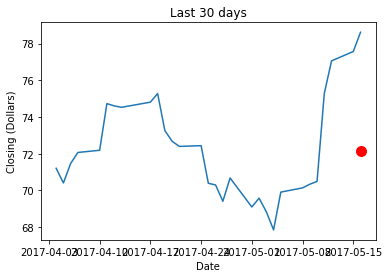

In [8]:
plt.plot(tidy.Date[-30:], tidy.adj_close[-30:])
plt.title('Last 30 days')
plt.xlabel('Date')
plt.ylabel('Closing (Dollars)')
plt.plot(tidy.Date[-1:], tidy.avg_30[-1:],marker = 'o', markersize = 10, color = 'r')

This red dot on the right side of the plot shows the mean of the last 30 days of stock price, as shown in this plot. So when looking at the red plots below, take into consideration that the value corresponding to day 30 actually takes into account the last 30 days. Now that we have added the 30 day moving average and standard deviation to the dataframe and you have a better understanding of what these values mean, lets see how the 30 day moving average compares to Apple's closing numbers by looking at a plot.

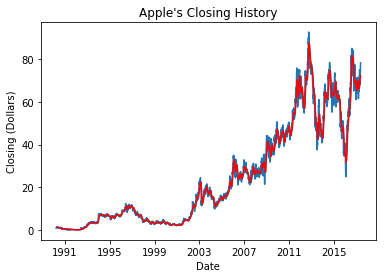

In [9]:
plt.plot(tidy.Date, avg)
plt.title('Apple\'s Closing History')
plt.xlabel('Date')
plt.ylabel('Closing (Dollars)')

plt.plot(tidy.Date[29:], tidy.avg_30[29:], color = 'r')

As you can see, the trailing mean correllates very strongly with the close price of AAPL when looking over a long peroid of time, but let's look at just the past year to date. 

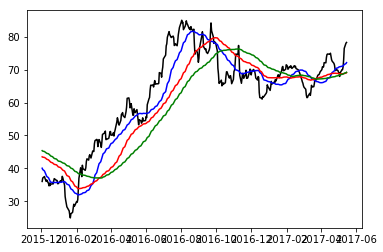

In [10]:
#plt.plot(tidy.Date[-365:], tidy.adj_low[-365:], color = 'r')
#plt.plot(tidy.Date[-365:], tidy.adj_high[-365:], color = 'g')
plt.plot(tidy.Date[-365:], avg[-365:], color = 'black')
plt.plot(tidy.Date[-365:], tidy.avg_30[-365:], color = 'b')
plt.plot(tidy.Date[-365:], tidy.avg_60[-365:], color = 'r')
plt.plot(tidy.Date[-365:], tidy.avg_90[-365:], color = 'g')


By using a 30 day trailing mean, we are given a like that fits the curve of the stock flow and removes a bit of the variance from the model. If you notice, whenever the stock price, shown in blue, drops far below the 30 day mean in red, it frequently shoots back up not long after, even if just for a short period of time. The same can be said if it drops below. 

--------------------------------------

Another thing we wanted to explore was which day of the week is the best for stocks/this stock in genereal. To do this we first add and fill a column for the day of the week Mon-Fri(0-4) respectively. We will then calculate the difference between the adjusted opening of one day and the adjusted opening of the next day as a percent relative to the adjuested opening of the first day.
    
    

In [81]:
dates = tidy.ix[:,0]

dayvals = [] * len(tidy.index)
for d in dates:
    daynum = d.weekday()
    dayvals.append(daynum)


tidy["DoTW"] = dayvals
tidy["adj_diff"] = 0
for i, row in tidy.iterrows():
    if(i < len(tidy.index) - 1):
        tidy.loc[i, 'adj_diff'] = (tidy['adj_open'][i+1] - row.adj_open)/row.adj_open
    #tidy.set_value(i,'adj_diff',(row.adj_open - row.adj_close)/row.adj_open)
tidy.head()

,Date,adj_close,adj_high,adj_low,adj_open,adj_volume,close,ex_dividend,high,low,...,split_ratio,volume,avg_30,std_30,avg_60,std_60,avg_90,std_90,adj_diff,DoTW
0,1990-03-26,1.139703,1.139703,0.982787,0.982787,4100.0,1.38,0.0,1.38,1.19,...,1.0,4100.0,NaN,NaN,NaN,NaN,NaN,NaN,0.050420,0
1,1990-03-27,1.139703,1.139703,0.924976,1.032340,3300.0,1.38,0.0,1.38,1.12,...,1.0,3300.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.044437,1
2,1990-03-28,0.986466,1.085941,0.986466,0.986466,10800.0,1.19,0.0,1.31,1.19,...,1.0,10800.0,NaN,NaN,NaN,NaN,NaN,NaN,0.056103,2
3,1990-03-29,1.091816,1.150158,0.991803,1.041809,41800.0,1.31,0.0,1.38,1.19,...,1.0,41800.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.054814,3
4,1990-03-30,1.034352,1.034352,0.984703,0.984703,1500.0,1.25,0.0,1.25,1.19,...,1.0,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,0.157407,4


Now we want to visualize the data to be able to properly anaylize it. So we will get the average adjusted difference and standard deviation for each day and we can graph them to compare.

In [77]:
#we can make a list off all the adjusted differences and put them in a dictonary corresponding to day of the week to
#make it easier to process them
diffs = dict()
diffs[0] = []
diffs[1] = []
diffs[2] = []
diffs[3] = []
diffs[4] = []
for i, row in tidy.iterrows():
    diffs[row.DoTW].append(row.adj_diff)
    
avg_diff = [0]*5
std_dev_diff = [0]*5
for i in range(0,5):
    avg_diff[i] = np.mean(sum(diffs[i])/len(diffs[i]))
    std_dev_diff[i] = np.std(diffs[i])

print('Average differences')
print(avg_diff)
print('Standard deviation of Differences')
print(std_dev_diff)

Average differences
[-0.0012941254976092879, -0.0023426935331410928, 0.0028775875661456486, 0.0061469675236216752, 0.0055155659547473168]
Standard deviation of Differences
[0.054041566749105631, 0.050096649658002118, 0.052267264031637679, 0.055352139334260086, 0.082892318511985821]


Now that we have each days average difference and standard deviation we will conduct a hypothesis test for each day to see if the average is statistically different than the mean in the direction of that averages sign. We will use a significance of alpha = .05 in our tests. So our hypothesis will be as follows:  
  
Day 1 & 2:  
H0(Null): avg_diff = 0 , Ha(alternative):avg_diff < 0  
  
Days 3, 4, and 5:  
H0(Null): avg_diff = 0 , Ha(alternative):avg_diff > 0  
  
Since n is large for each of the averages our test statistics will be $$Z_i = \frac{avg_i}{\frac{s_i}{\sqrt{n_i}}}$$  
So we will now compute these test statistics and get their p-values from the Standard normal curve


In [80]:
Z = [0]*5
for i in range(0,5):
    Z[i] = (avg_diff[i])/(std_dev_diff[i]/(math.sqrt(len(diffs[i]))))
#we will use scipy to get the p Values from these test statistics
p_values = [0]*5
for i in range(0,5):
    p_values[i] = norm.sf(abs(Z[i]))
print("P values")
print(p_values)

P values
[0.19459468624382831, 0.039921064982032226, 0.019630068466005447, 1.8991635690911865e-05, 0.0069615499839422845]


From these p values we can see that we reject the null on everyday except for day one with the significance level of .05. This means that we are able to conclude that there is a significant difference when trading during 24-hour time slots based on the day of the week. We can see that on tuesday this stock does worse than average, its difference between its adjusted opening price and the adjusted opening price of wednesday is negative. We are also able to say that Wed-Fri the stock does better than average meaning its cost increases during this time peroid.